In [135]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
seed=0
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
import timeit

In [136]:
#Reading the Train and Test dataset
loan_train = pd.read_csv("loan_data_train.csv")
loan_test = pd.read_csv("loan_data_test.csv")
loan_train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [137]:
print(loan_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
ID                                2199 non-null float64
Amount.Requested                  2199 non-null object
Amount.Funded.By.Investors        2199 non-null object
Interest.Rate                     2200 non-null object
Loan.Length                       2199 non-null object
Loan.Purpose                      2199 non-null object
Debt.To.Income.Ratio              2199 non-null object
State                             2199 non-null object
Home.Ownership                    2199 non-null object
Monthly.Income                    2197 non-null float64
FICO.Range                        2200 non-null object
Open.CREDIT.Lines                 2196 non-null object
Revolving.CREDIT.Balance          2197 non-null object
Inquiries.in.the.Last.6.Months    2197 non-null float64
Employment.Length                 2131 non-null object
dtypes: float64(3), object(12)
memory usage: 257.9+ KB
None


#####  DATA PREPARATION

In [138]:
#Concat Train and Test dataset to make preprocessing simpler
loan_test["Origin"] = "test"
loan_train["Origin"] = "train"
loan_test["Interest.Rate"] = "99.99%"

In [139]:
loan_test =loan_test.reindex(columns = list(loan_train))

In [140]:
loan_test.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Origin
0,20093,5000,5000,99.99%,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year,test
1,62445,18000,18000,99.99%,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years,test
2,65248,7200,7200,99.99%,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years,test
3,81822,7200,7200,99.99%,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years,test
4,57923,22000,22000,99.99%,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years,test


In [141]:
loan_train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Origin
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,train
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,train
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,train
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,train
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,train


In [142]:
loan = pd.concat([loan_train,loan_test])
print(loan.shape)
print("*"*60)
print(loan.info())
print("*"*60)
print(loan.isna().sum())

(2500, 16)
************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 16 columns):
ID                                2499 non-null float64
Amount.Requested                  2499 non-null object
Amount.Funded.By.Investors        2499 non-null object
Interest.Rate                     2500 non-null object
Loan.Length                       2499 non-null object
Loan.Purpose                      2499 non-null object
Debt.To.Income.Ratio              2499 non-null object
State                             2499 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2497 non-null float64
FICO.Range                        2500 non-null object
Open.CREDIT.Lines                 2496 non-null object
Revolving.CREDIT.Balance          2497 non-null object
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2422 non-null o

In [143]:
loan.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Origin
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,train
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,train
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,train
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,train
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,train


In [144]:
#Since Inquiries.in.the.Last.6.Months feature has a lot of missing values we will drop the column
#loan.drop("Inquiries.in.the.Last.6.Months",1,inplace=True)

In [145]:
#Dropping the ID column
loan.drop("ID",axis=1,inplace=True)

In [146]:
#Removing percentage sign in Interest.Rate and Debt.To.Income.Ratio
def remove_percentage(df,columns):
    for cols in columns:
         df[cols] = df[cols].apply(lambda x : x.split("%")[0])

In [149]:
#Cleaning Employment.Length feature
loan["Employment.Length"].value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment.Length, dtype: int64

In [150]:
mapping = {"years":"","year":"","+":"","< 1":"0"}
for abbrev, name in mapping.items():
                                   loan["Employment.Length"]=loan["Employment.Length"].str.replace(abbrev, name)                                   
    

In [157]:
loan["Employment.Length"] = pd.to_numeric(loan["Employment.Length"],errors = "coerce")

In [152]:
loan["Employment.Length"]=np.where(loan["Employment.Length"]=='.', loan["Employment.Length"].mode()[0],loan["Employment.Length"])

In [158]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 15 columns):
Amount.Requested                  2499 non-null object
Amount.Funded.By.Investors        2499 non-null object
Interest.Rate                     2500 non-null object
Loan.Length                       2499 non-null object
Loan.Purpose                      2499 non-null object
Debt.To.Income.Ratio              2499 non-null object
State                             2499 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2497 non-null float64
FICO.Range                        2500 non-null object
Open.CREDIT.Lines                 2496 non-null object
Revolving.CREDIT.Balance          2497 non-null object
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2422 non-null float64
Origin                            2500 non-null object
dtypes: float64(3), object(12)
memory usage: 312.5+ KB


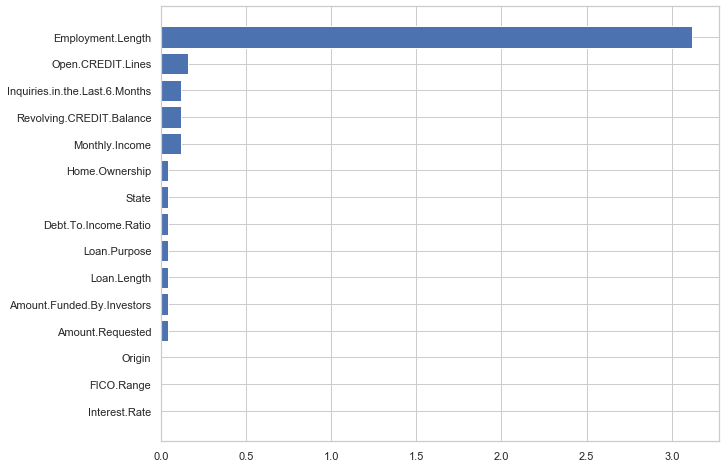

In [159]:
plt.figure(figsize=(10,8))
missing = pd.DataFrame({'column':loan.columns ,'na_percent':loan.isna().sum()/len(loan)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

In [160]:
loan.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 78
Origin                             0
dtype: int64

In [162]:
#The high number of missing values in Employment.Length is because of the fact that most of the customers seekimng loan are not educated.
loan["Employment.Length"].fillna(loan["Employment.Length"].mean(),inplace=True)

In [164]:
#Dropping the missing values as they are significantly low in percentage.
loan.dropna(inplace=True)

In [165]:
remove_percentage(loan,["Interest.Rate","Debt.To.Income.Ratio"])

In [166]:
loan.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Origin
0,25000,25000,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5.0,train
1,19750,19750,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4.0,train
2,2100,2100,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,690-694,13,893,1.0,0.0,train
3,28000,28000,16.29,36 months,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10.0,train
4,24250,17431.82,12.23,60 months,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10.0,train


In [167]:
#Changing the format of FICO range
k=loan['FICO.Range'].str.split("-",expand=True).astype(float)

loan['Fico']=(k[0]+k[1])/2

del loan['FICO.Range']

In [168]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2487 entries, 0 to 299
Data columns (total 15 columns):
Amount.Requested                  2487 non-null object
Amount.Funded.By.Investors        2487 non-null object
Interest.Rate                     2487 non-null object
Loan.Length                       2487 non-null object
Loan.Purpose                      2487 non-null object
Debt.To.Income.Ratio              2487 non-null object
State                             2487 non-null object
Home.Ownership                    2487 non-null object
Monthly.Income                    2487 non-null float64
Open.CREDIT.Lines                 2487 non-null object
Revolving.CREDIT.Balance          2487 non-null object
Inquiries.in.the.Last.6.Months    2487 non-null float64
Employment.Length                 2487 non-null float64
Origin                            2487 non-null object
Fico                              2487 non-null float64
dtypes: float64(4), object(11)
memory usage: 310.9+ KB


In [169]:
loan.isin([0.0,-0.01]).sum()

Amount.Requested                     0
Amount.Funded.By.Investors           0
Interest.Rate                        0
Loan.Length                          0
Loan.Purpose                         0
Debt.To.Income.Ratio                 0
State                                0
Home.Ownership                       0
Monthly.Income                       0
Open.CREDIT.Lines                    0
Revolving.CREDIT.Balance             7
Inquiries.in.the.Last.6.Months    1245
Employment.Length                  246
Origin                               0
Fico                                 0
dtype: int64

In [170]:
loan["Loan.Length"]=np.where(loan["Loan.Length"]=='.', loan["Loan.Length"].mode()[0],loan["Loan.Length"])

In [171]:
loan["Amount.Requested"] = np.where(loan["Amount.Requested"] == '.', loan["Amount.Funded.By.Investors"], loan["Amount.Requested"])

In [172]:
loan["Amount.Funded.By.Investors"] = np.where(loan["Amount.Funded.By.Investors"] == '.', loan["Amount.Requested"],loan["Amount.Funded.By.Investors"])

In [173]:
#Converting Object type to Numeric
columns_to_numeric = ["Amount.Requested","Amount.Funded.By.Investors","Interest.Rate","Debt.To.Income.Ratio"]
for cols in columns_to_numeric:
    loan[cols] = pd.to_numeric(loan[cols],errors="raise")
    print(cols)

Amount.Requested
Amount.Funded.By.Investors
Interest.Rate
Debt.To.Income.Ratio


In [174]:
a = ["Revolving.CREDIT.Balance","Open.CREDIT.Lines"]
for i in a:
    loan[i] = pd.to_numeric(loan[i],errors="coerce")

In [175]:
loan = loan[~(loan["Amount.Funded.By.Investors"]==-0.01)]

In [176]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 0 to 299
Data columns (total 15 columns):
Amount.Requested                  2485 non-null int64
Amount.Funded.By.Investors        2485 non-null float64
Interest.Rate                     2485 non-null float64
Loan.Length                       2485 non-null object
Loan.Purpose                      2485 non-null object
Debt.To.Income.Ratio              2485 non-null float64
State                             2485 non-null object
Home.Ownership                    2485 non-null object
Monthly.Income                    2485 non-null float64
Open.CREDIT.Lines                 2480 non-null float64
Revolving.CREDIT.Balance          2483 non-null float64
Inquiries.in.the.Last.6.Months    2485 non-null float64
Employment.Length                 2485 non-null float64
Origin                            2485 non-null object
Fico                              2485 non-null float64
dtypes: float64(9), int64(1), object(5)
memory usage: 310.6+ 

In [177]:
loan.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Origin,Fico
0,25000,25000.00,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,11.0,15210.0,3.0,5.0,train,722.0
1,19750,19750.00,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,14.0,19070.0,3.0,4.0,train,712.0
2,2100,2100.00,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,13.0,893.0,1.0,0.0,train,692.0
3,28000,28000.00,16.29,36 months,credit_card,19.62,NV,MORTGAGE,7083.33,12.0,38194.0,1.0,10.0,train,712.0
4,24250,17431.82,12.23,60 months,credit_card,23.79,OH,MORTGAGE,5833.33,6.0,31061.0,2.0,10.0,train,732.0


In [178]:
loan.isin([np.nan]).sum()

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
Open.CREDIT.Lines                 5
Revolving.CREDIT.Balance          2
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
Origin                            0
Fico                              0
dtype: int64

In [179]:
loan.dropna(inplace=True)

#### DATA EXPLORATION

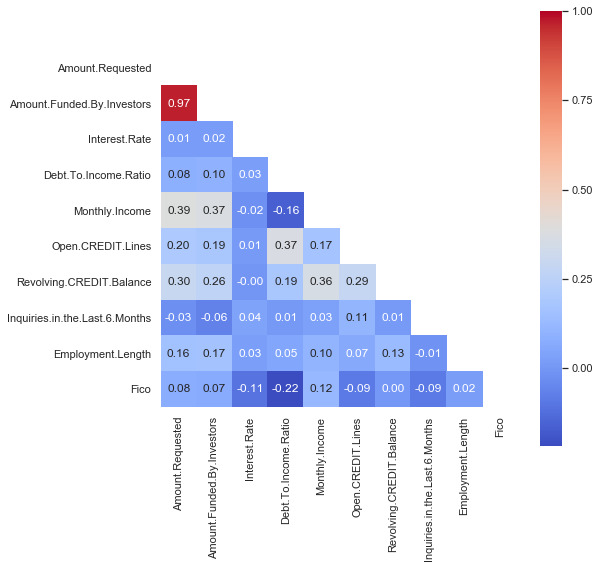

In [180]:
# Removing serial no. and checking correlation.
corr = loan.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig,ax = plt.subplots(figsize=(8, 8))
with sns.axes_style("white"):
    sns.heatmap(corr, ax=ax, annot=True, mask=mask, square=True,fmt= '.2f',cmap="coolwarm")
plt.show()

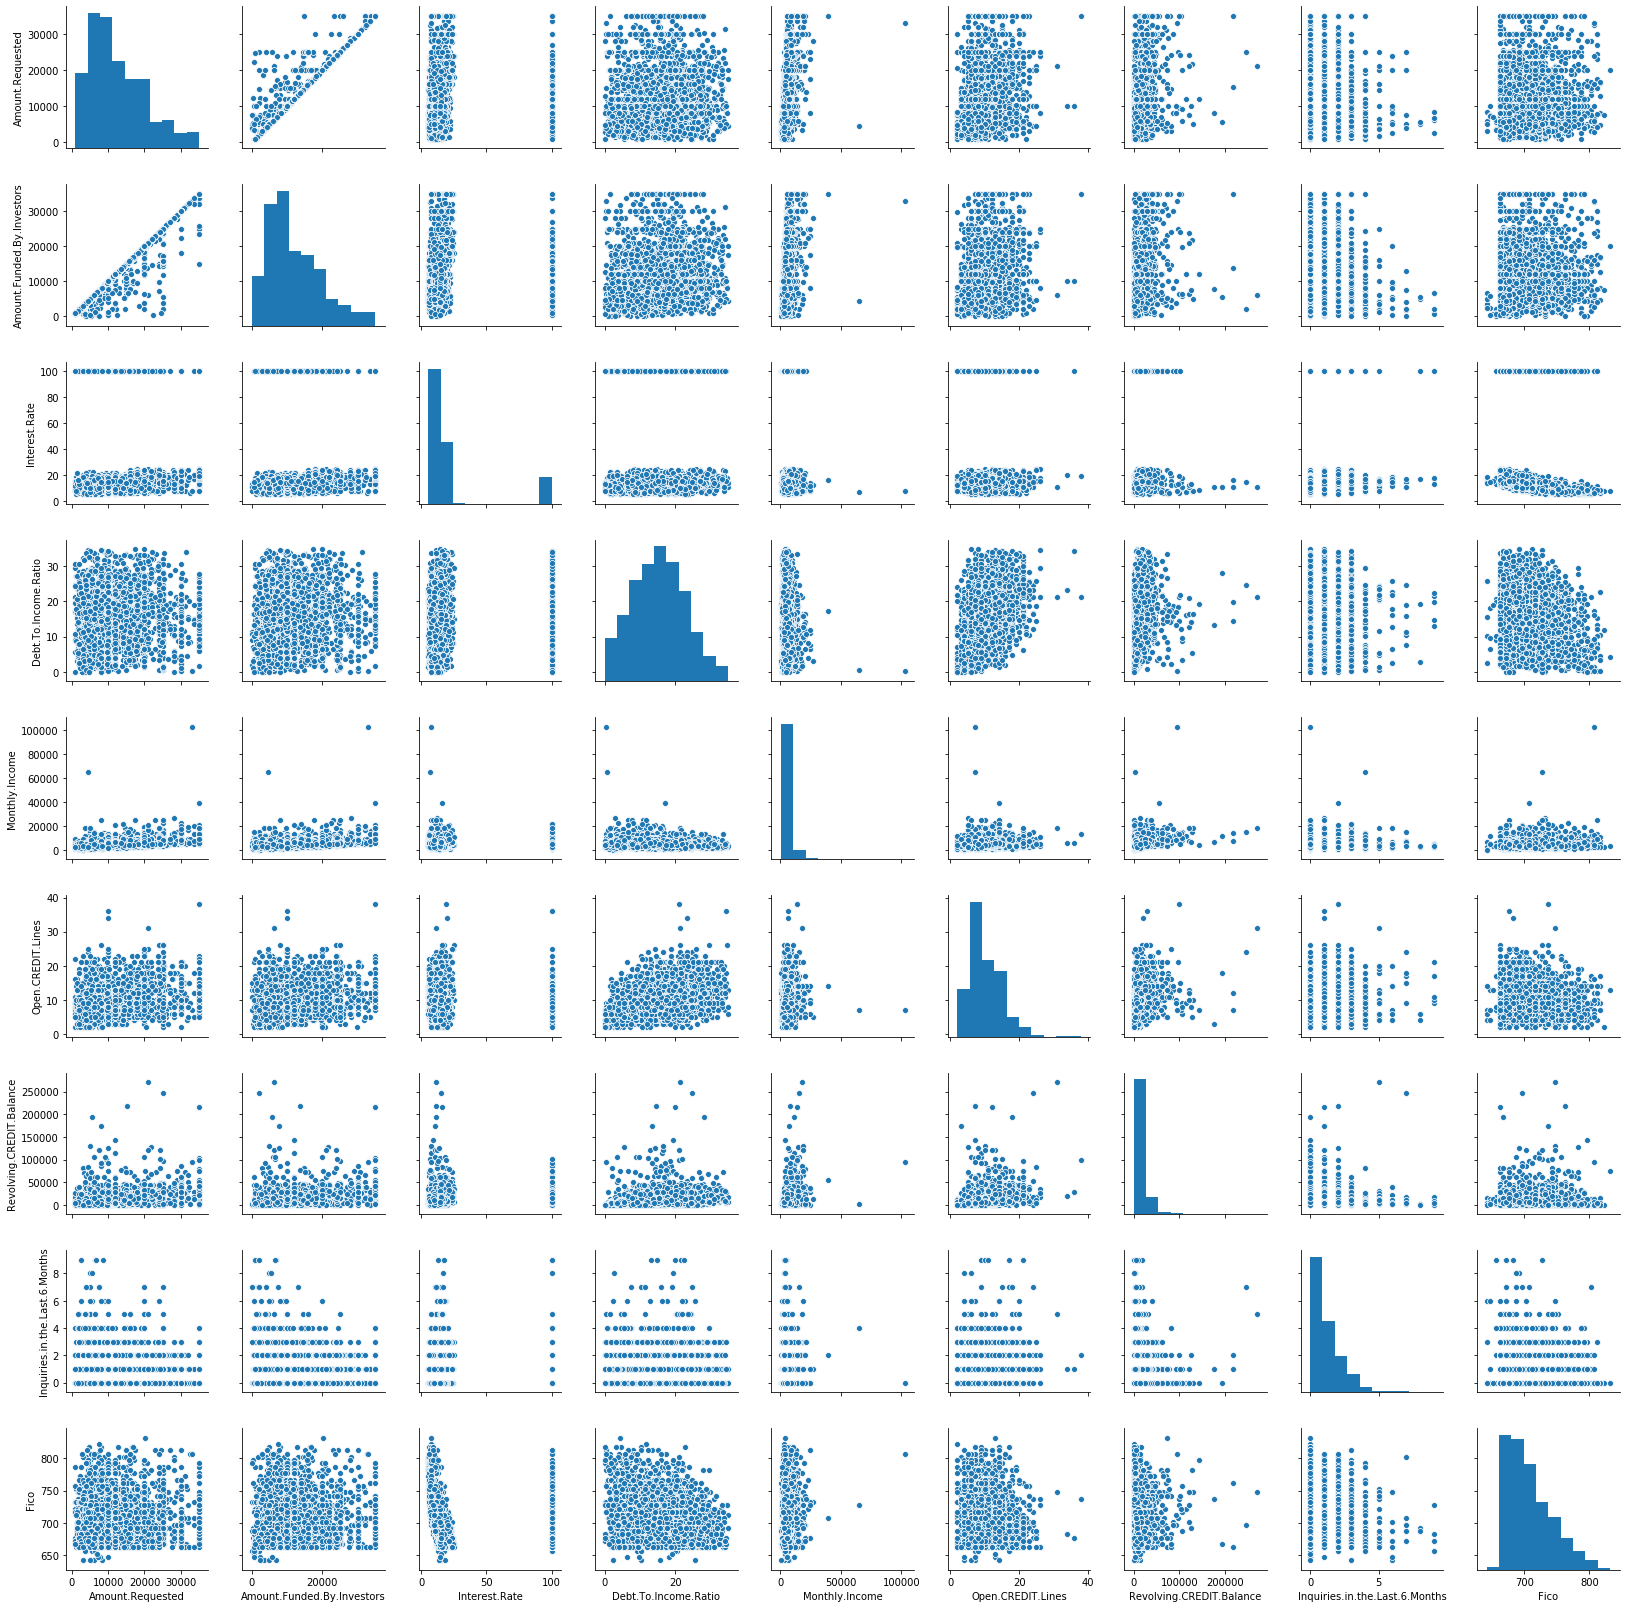

In [186]:
sns.pairplot(loan)

In [181]:
# list of numerical variables
num_vars = [var for var in loan.columns if loan[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualize the numerical variables
loan[num_vars].head()

Number of numerical variables:  10


,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico
0,25000,25000.00,18.49,27.56,8606.56,11.0,15210.0,3.0,5.0,722.0
1,19750,19750.00,17.27,13.39,6737.50,14.0,19070.0,3.0,4.0,712.0
2,2100,2100.00,14.33,3.50,1000.00,13.0,893.0,1.0,0.0,692.0
3,28000,28000.00,16.29,19.62,7083.33,12.0,38194.0,1.0,10.0,712.0
4,24250,17431.82,12.23,23.79,5833.33,6.0,31061.0,2.0,10.0,732.0


##### Discrete variables

In [182]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(loan[var].unique())<30]

print('Number of discrete variables: ', len(discrete_vars))
loan[discrete_vars].head()

Number of discrete variables:  3


,Open.CREDIT.Lines,Inquiries.in.the.Last.6.Months,Employment.Length
0,11.0,3.0,5.0
1,14.0,3.0,4.0
2,13.0,1.0,0.0
3,12.0,1.0,10.0
4,6.0,2.0,10.0


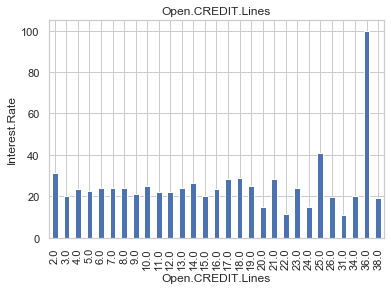

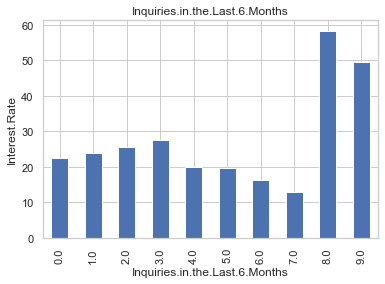

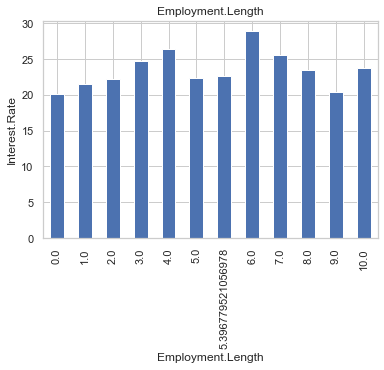

In [183]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['Interest.Rate'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('Interest.Rate')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(loan, var)

- The relationship between the discrete features and Interest rate are not monotonic in nature.
- Feature engineering has to be done carefully for these variables.

##### Continous Variables

In [184]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

loan[cont_vars].head()

Number of continuous variables:  7


,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Revolving.CREDIT.Balance,Fico
0,25000,25000.00,18.49,27.56,8606.56,15210.0,722.0
1,19750,19750.00,17.27,13.39,6737.50,19070.0,712.0
2,2100,2100.00,14.33,3.50,1000.00,893.0,692.0
3,28000,28000.00,16.29,19.62,7083.33,38194.0,712.0
4,24250,17431.82,12.23,23.79,5833.33,31061.0,732.0


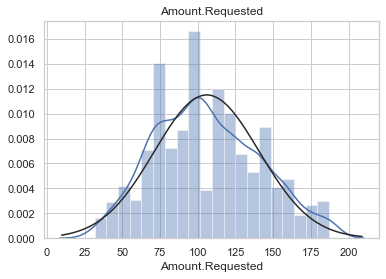

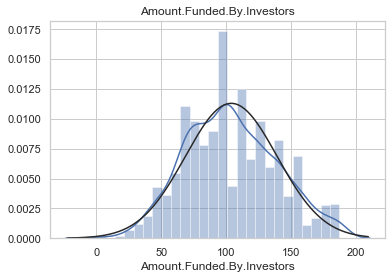

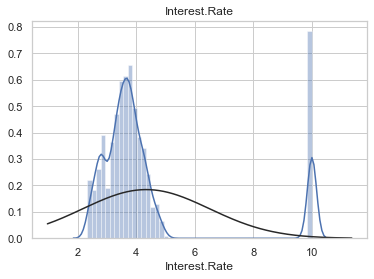

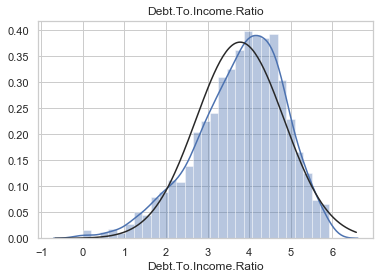

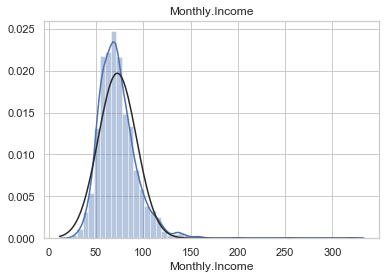

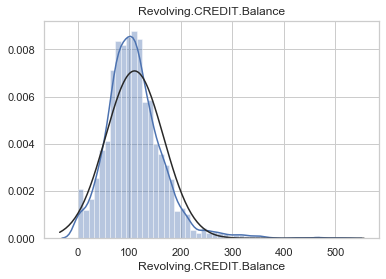

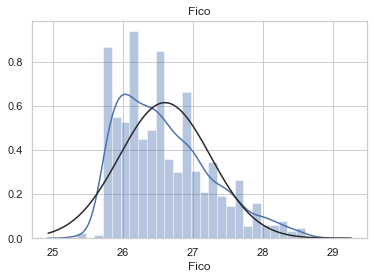

In [185]:
# Let's go ahead and analyse the distributions of these variables
from scipy.stats import norm
def analyse_continous(df, var):
    df = df.copy()
    #df[var].hist(bins=20)
    
    sns.distplot(np.sqrt(df[var]),fit=norm)
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(loan, var)

- We see that all of the above variables, are not normally distributed, including the target variable. For linear models to perform best, we need to account for non-Gaussian distributions

In [186]:
sqrt_trans = ["Amount.Requested","Amount.Funded.By.Investors","Monthly.Income","Revolving.CREDIT.Balance"]
for var in sqrt_trans:
    loan[var] = np.sqrt(loan[var])

- Log transform is more likely to normalize the distribution of the features.

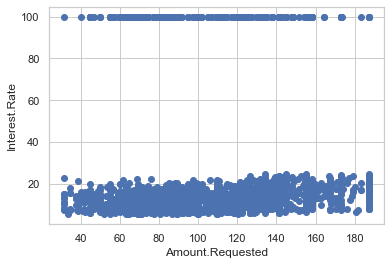

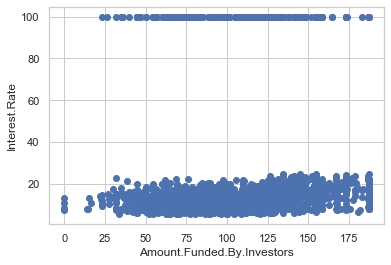

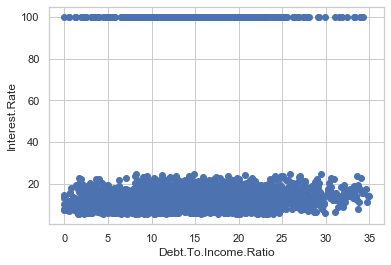

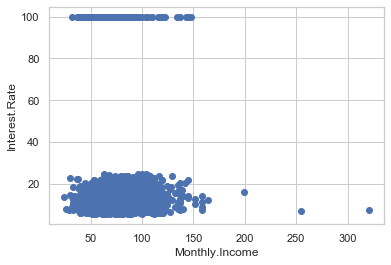

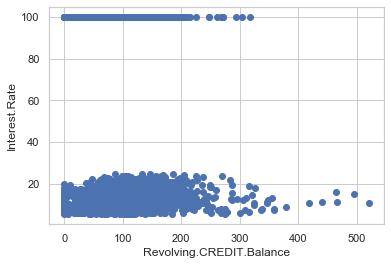

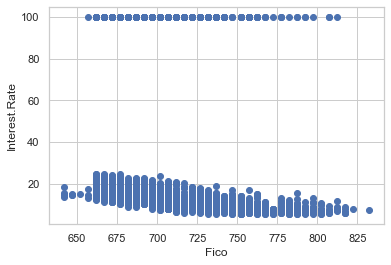

In [187]:
def transform_analyse_continous(df, var):
    df = df.copy()
    plt.scatter(df[var], df['Interest.Rate'])
    plt.ylabel('Interest.Rate')
    plt.xlabel(var)
    plt.show()
    
for var in cont_vars:
    if var !='Interest.Rate':
        transform_analyse_continous(loan, var)

- Fico feature has a good correlation with Interest.Rate.

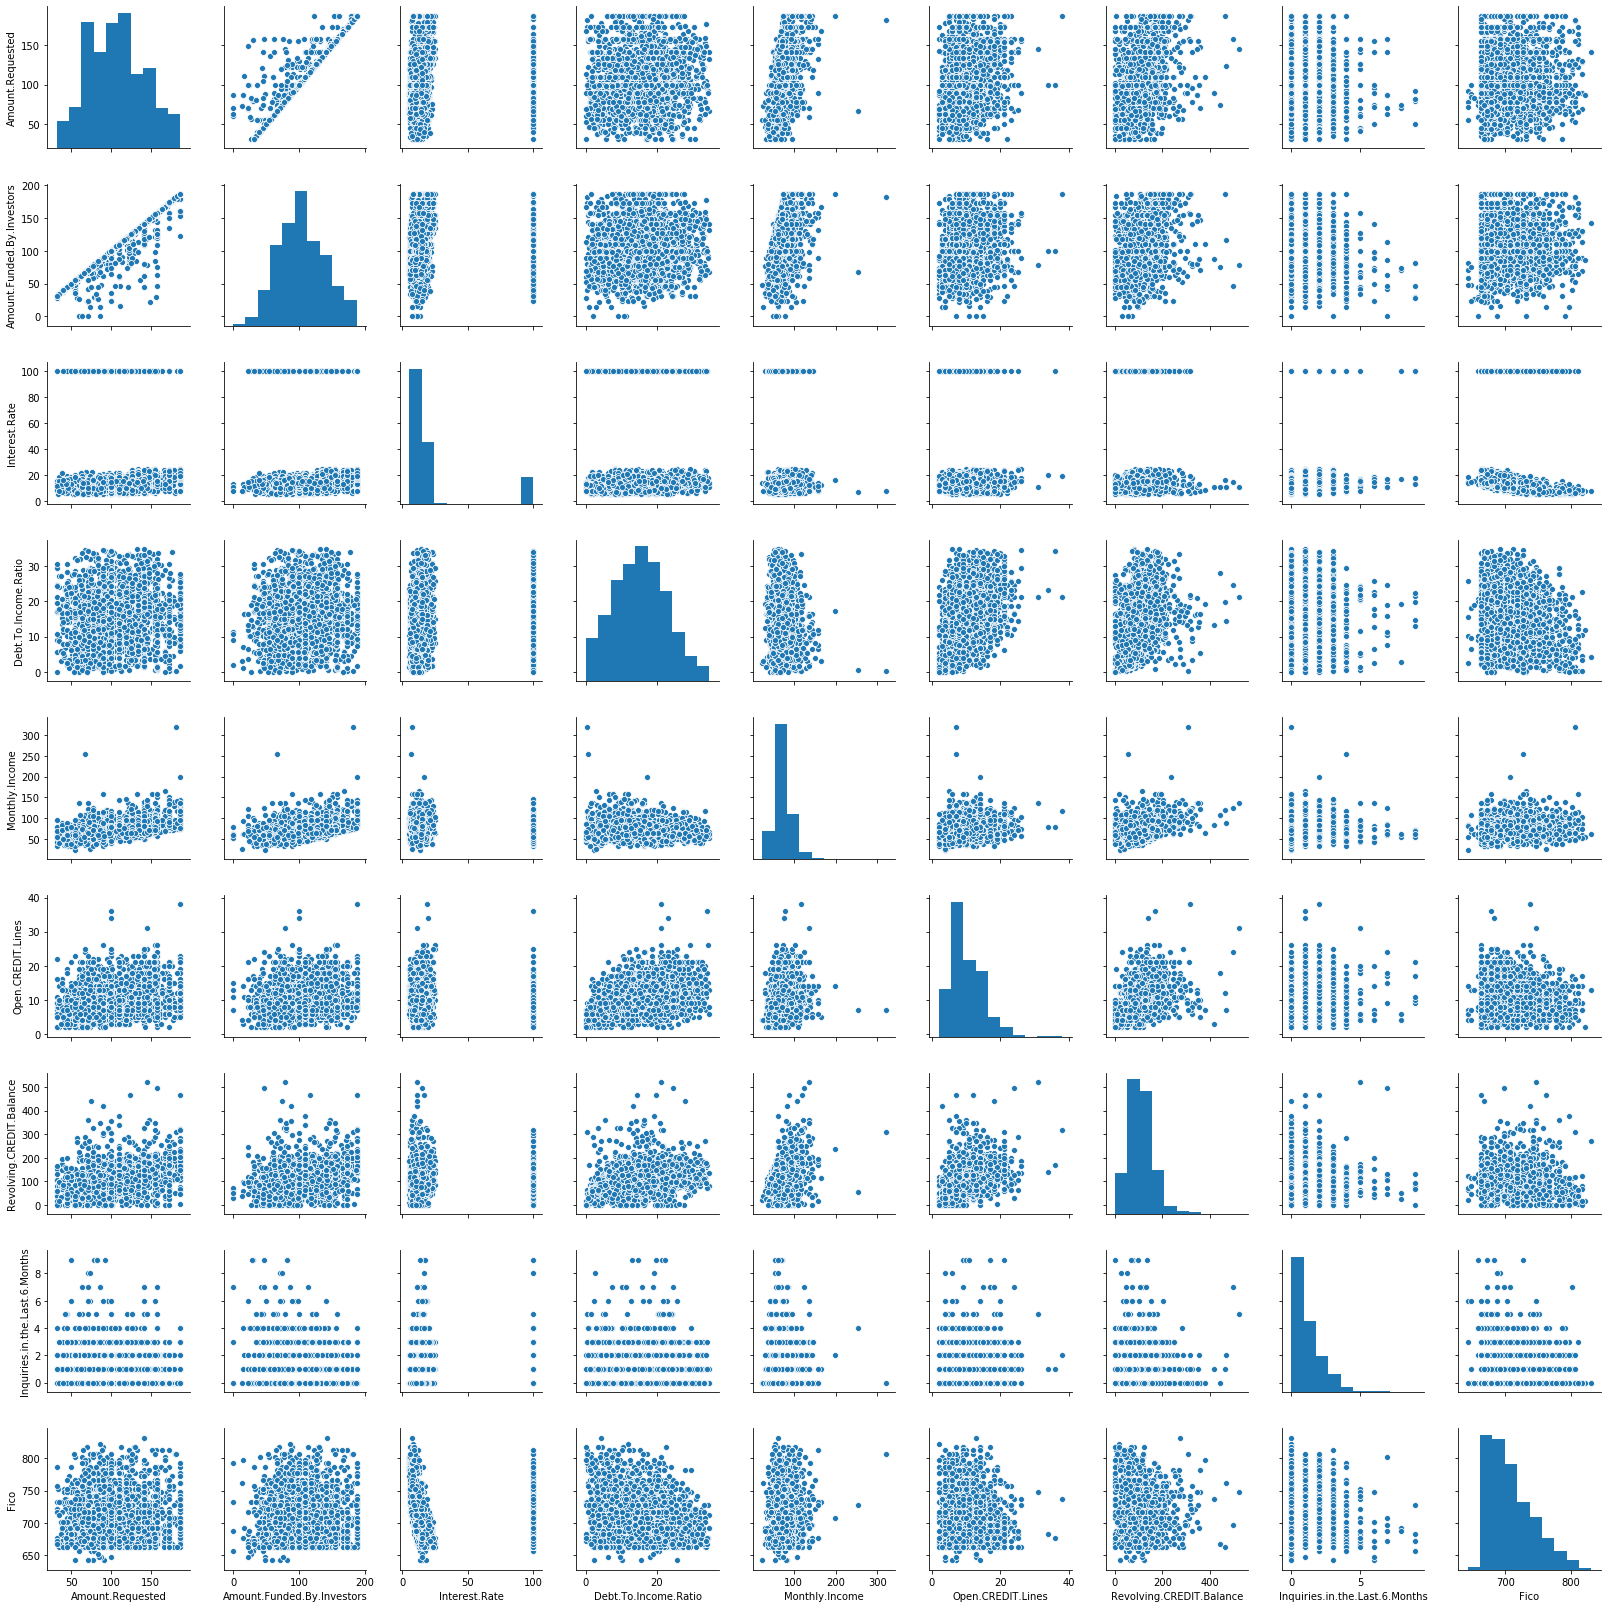

In [194]:
sns.pairplot(loan)

##### Outliers

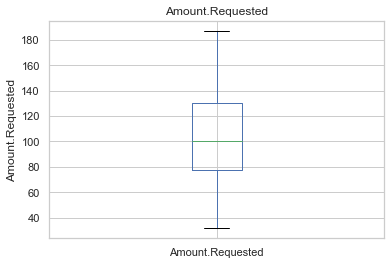

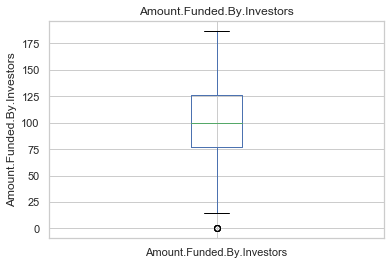

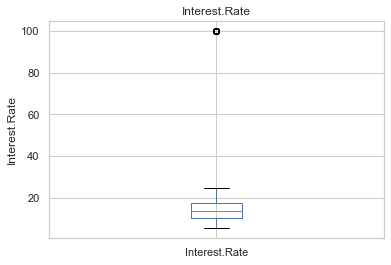

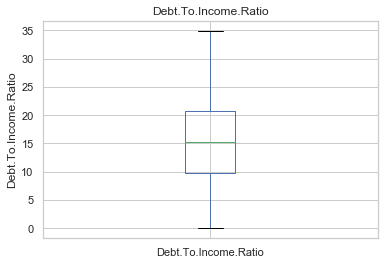

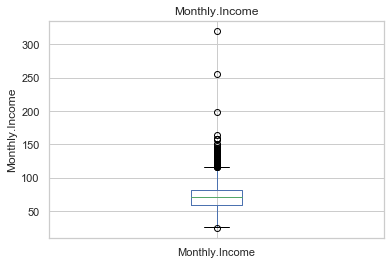

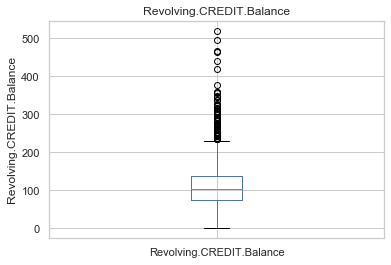

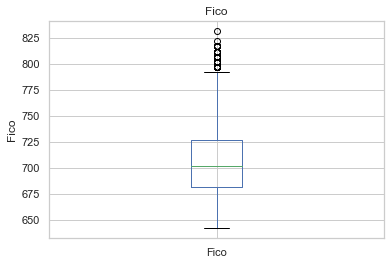

In [188]:
# let's make boxplots to visualise outliers in the continuous variables 

def find_outliers(df, var):
    df = df.copy()
    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()
    
for var in cont_vars:
    find_outliers(loan, var)

- Monthly Income and Fico range has some Outliers or Extreme values.
- We should be careful while treating the outliers as it may also be a extreme value which should not be treated.

##### Categorical Variables

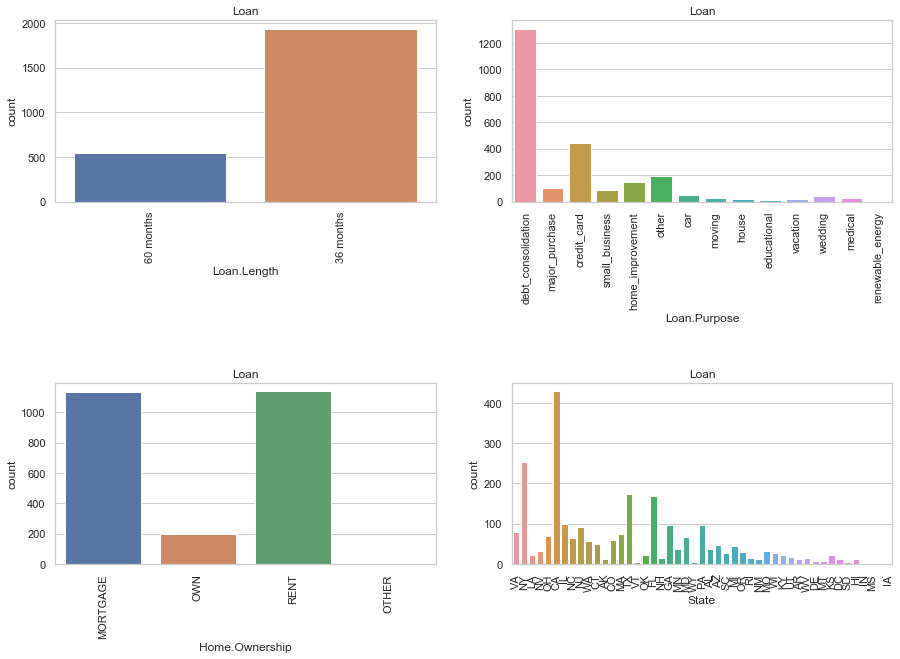

In [189]:
cat_cols=['Loan.Length', 'Loan.Purpose', 'Home.Ownership','State']
fig=plt.subplots(figsize=(15,10))
for i, j in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = loan)
    plt.xticks(rotation=90)
    plt.title("Loan")
    
plt.show()

#### FEATURE ENGINEERING

Before beginning to engineer our features, it is important to separate our data intro training and testing set. This is to avoid over-fitting and data leakage vulnerabilities.

In [190]:
#Since Data discrepancy has happened during data entry we will remove these rows
loan = loan[~((loan["Amount.Funded.By.Investors"].isin([0.0,-0.01])))]
#Splitting the data into training and testing dataset
loan_train = loan[loan["Origin"]=="train"]
loan_test = loan[loan["Origin"]=="test"]

##### Statistical Tests

In [191]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2176 entries, 0 to 2199
Data columns (total 15 columns):
Amount.Requested                  2176 non-null float64
Amount.Funded.By.Investors        2176 non-null float64
Interest.Rate                     2176 non-null float64
Loan.Length                       2176 non-null object
Loan.Purpose                      2176 non-null object
Debt.To.Income.Ratio              2176 non-null float64
State                             2176 non-null object
Home.Ownership                    2176 non-null object
Monthly.Income                    2176 non-null float64
Open.CREDIT.Lines                 2176 non-null float64
Revolving.CREDIT.Balance          2176 non-null float64
Inquiries.in.the.Last.6.Months    2176 non-null float64
Employment.Length                 2176 non-null float64
Origin                            2176 non-null object
Fico                              2176 non-null float64
dtypes: float64(10), object(5)
memory usage: 272.0+ KB


In [192]:
#Loan.Length

In [193]:
loan_train["Loan.Length"].value_counts()

36 months    1702
60 months     474
Name: Loan.Length, dtype: int64

In [194]:
df1 = loan_train[loan_train["Loan.Length"]=="36 months"]["Interest.Rate"]
df2 = loan_train[loan_train["Loan.Length"]=="60 months"]["Interest.Rate"]
stats.ttest_ind(df1,df2)

Ttest_indResult(statistic=-21.866145602044664, pvalue=5.731182554691399e-96)

In [195]:
#Loan.Purpose
loan_train["Loan.Purpose"].value_counts()

debt_consolidation    1144
credit_card            388
other                  168
home_improvement       133
major_purchase          82
small_business          79
car                     44
wedding                 35
medical                 26
moving                  24
house                   19
vacation                18
educational             13
renewable_energy         3
Name: Loan.Purpose, dtype: int64

In [196]:
df1 = loan_train[loan_train["Loan.Purpose"]=="debt_consolidation"]["Interest.Rate"]
df2 = loan_train[loan_train["Loan.Purpose"]=="credit_card"]["Interest.Rate"]
df3 = loan_train[loan_train["Loan.Purpose"]=="other"]["Interest.Rate"]
df4 = loan_train[loan_train["Loan.Purpose"]=="home_improvement"]["Interest.Rate"]
df5 = loan_train[loan_train["Loan.Purpose"]=="major_purchase"]["Interest.Rate"]
df6 = loan_train[loan_train["Loan.Purpose"]=="small_business"]["Interest.Rate"]
df7 = loan_train[loan_train["Loan.Purpose"]=="car"]["Interest.Rate"]
df8 = loan_train[loan_train["Loan.Purpose"]=="wedding"]["Interest.Rate"]
df9 = loan_train[loan_train["Loan.Purpose"]=="medical"]["Interest.Rate"]
df10 = loan_train[loan_train["Loan.Purpose"]=="moving"]["Interest.Rate"]
df11 = loan_train[loan_train["Loan.Purpose"]=="house"]["Interest.Rate"]
df12 = loan_train[loan_train["Loan.Purpose"]=="vacation"]["Interest.Rate"]
df13 = loan_train[loan_train["Loan.Purpose"]=="educational"]["Interest.Rate"]
df14 = loan_train[loan_train["Loan.Purpose"]=="renewable_energy"]["Interest.Rate"]

stats.f_oneway(df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14)

F_onewayResult(statistic=6.803262508601272, pvalue=5.453350796022755e-13)

In [197]:
loan_train["Employment.Length"].value_counts()

10.00000    572
0.00000     225
2.00000     217
3.00000     202
5.00000     178
4.00000     160
1.00000     157
6.00000     130
7.00000     107
8.00000      94
5.39678      69
9.00000      65
Name: Employment.Length, dtype: int64

In [198]:
df1 = loan_train[loan_train["Employment.Length"]=="0 "]["Interest.Rate"]
df2 = loan_train[loan_train["Employment.Length"]=="1 "]["Interest.Rate"]
df3 = loan_train[loan_train["Employment.Length"]=="2 "]["Interest.Rate"]
df4 = loan_train[loan_train["Employment.Length"]=="3 "]["Interest.Rate"]
df5 = loan_train[loan_train["Employment.Length"]=="4 "]["Interest.Rate"]
df6 = loan_train[loan_train["Employment.Length"]=="5 "]["Interest.Rate"]
df7 = loan_train[loan_train["Employment.Length"]=="6 "]["Interest.Rate"]
df8 = loan_train[loan_train["Employment.Length"]=="7 "]["Interest.Rate"]
df9 = loan_train[loan_train["Employment.Length"]=="8 "]["Interest.Rate"]
df10 = loan_train[loan_train["Employment.Length"]=="9 "]["Interest.Rate"]
df11 = loan_train[loan_train["Employment.Length"]=="10 "]["Interest.Rate"]

stats.f_oneway(df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11)

F_onewayResult(statistic=nan, pvalue=nan)

In [199]:
loan_train["Home.Ownership"].value_counts()

MORTGAGE    1008
RENT         988
OWN          176
OTHER          4
Name: Home.Ownership, dtype: int64

In [200]:
df1 = loan_train[loan_train["Home.Ownership"]=="MORTGAGE"]["Interest.Rate"]
df2 = loan_train[loan_train["Home.Ownership"]=="RENT"]["Interest.Rate"]
df3 = loan_train[loan_train["Home.Ownership"]=="OWN"]["Interest.Rate"]
df4 = loan_train[loan_train["Home.Ownership"]=="OTHER"]["Interest.Rate"]

stats.f_oneway(df1,df2,df3,df4)

F_onewayResult(statistic=7.230689681155176, pvalue=7.94055007380039e-05)

##### Encoding

In [201]:
cat_to_num = ["Loan.Length","Loan.Purpose","State","Home.Ownership"]

for feat in cat_to_num:

    lbe = LabelEncoder()
    lbe.fit(loan_train[feat].values)
    diz_map_train = dict(zip(lbe.classes_, lbe.transform(lbe.classes_)+1))

    for i in set(loan_test[feat]).difference(loan_train[feat]):
        diz_map_train[i] = 0

    loan_train[feat] = [diz_map_train[i] for i in loan_train[feat].values]
    loan_test[feat] = [diz_map_train[i] for i in loan_test[feat].values]

In [202]:
loan_train.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Origin,Fico
0,158.113883,158.113883,18.49,2,3,27.56,41,1,92.771547,11.0,123.328829,3.0,5.0,train,722.0
1,140.534693,140.534693,17.27,2,3,13.39,31,1,82.082276,14.0,138.094171,3.0,4.0,train,712.0
2,45.825757,45.825757,14.33,1,7,3.50,18,3,31.622777,13.0,29.883106,1.0,0.0,train,692.0
3,167.332005,167.332005,16.29,1,2,19.62,30,1,84.162521,12.0,195.432853,1.0,10.0,train,712.0
4,155.724115,132.029618,12.23,2,2,23.79,32,1,76.376240,6.0,176.241312,2.0,10.0,train,732.0


In [203]:
loan_train.drop(["Origin"],axis=1,inplace=True)
loan_test.drop(["Origin"],axis=1,inplace=True)

In [204]:
train_columns = loan_train.columns
test_columns = loan_test.columns

##### Scaling 

In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
loan_train = scaler.fit_transform(loan_train)
loan_test = scaler.transform(loan_test)
loan_train = pd.DataFrame(loan_train,columns=train_columns)
loan_test = pd.DataFrame(loan_test,columns=test_columns)

In [206]:
loan_train.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico
0,1.484375,1.526034,1.301067,1.894919,-0.434652,1.623162,1.508724,-1.056918,0.972118,0.204506,0.229445,1.745014,-0.104085,0.399888
1,0.979975,1.027255,1.008629,1.894919,-0.434652,-0.268497,0.734034,-1.056918,0.451020,0.871681,0.491155,1.745014,-0.385305,0.114591
2,-1.737509,-1.659949,0.303902,-0.527727,0.853031,-1.588788,-0.273064,0.328536,-2.008862,0.649289,-1.426844,0.088317,-1.510186,-0.456004
3,1.748871,1.787583,0.773720,-0.527727,-0.756573,0.563192,0.656565,-1.056918,0.552431,0.426898,1.507461,0.088317,1.302016,0.114591
4,1.415805,0.785938,-0.199475,1.894919,-0.756573,1.119877,0.811503,-1.056918,0.172853,-0.907452,1.167298,0.916665,1.302016,0.685186


In [207]:
loan_test.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico
0,-1.023486,-0.953882,20.836878,1.894919,1.496873,-0.375295,0.734034,1.021263,-0.310656,0.649289,-0.402597,-0.740032,-1.510186,-0.456004
1,0.797183,0.846500,20.836878,1.894919,-0.434652,-1.397886,-1.202693,1.021263,-0.015356,-0.907452,-0.047840,-0.740032,1.302016,0.114591
2,-0.617706,-0.552623,20.836878,1.894919,-0.434652,1.302768,-0.273064,-1.056918,-0.565167,0.649289,-0.443883,-0.740032,0.177135,1.255781
3,-0.617706,-0.552623,20.836878,-0.527727,-0.434652,0.249473,0.734034,-1.056918,-0.700933,0.871681,-0.723662,-0.740032,1.302016,2.396970
4,1.203473,1.248262,20.836878,1.894919,-0.434652,0.384305,-0.040657,-1.056918,0.251801,-0.240277,0.561445,-0.740032,0.739576,0.399888


In [208]:
loan_test.drop(["Interest.Rate"],axis=1,inplace=True)

##### Assumptions of Linear Regression

In [209]:
import statsmodels.api as sm
X = loan_train.drop(["Interest.Rate"],1)
y = loan_train["Interest.Rate"]
X_C = sm.add_constant(X)
ols_model = sm.OLS(y,X_C).fit()

In [210]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest.Rate   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     525.6
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:19:17   Log-Likelihood:                -1536.5
No. Observations:                2176   AIC:                             3101.
Df Residuals:                    2162   BIC:                             3181.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.806e-17      0.011   -7.4e-15      1.000      -0.021       0.021
Amount.Requested                   0.1102      0.039      2.808      0.005       0.033       0.187
Amount.Funded.By.Investors         0.1890      0.039      4.885      0.000       0.113       0.265
Loan.Length                        0.3173      0.012     27.270      0.000       0.295       0.340
Loan.Purpose                       0.0563      0.011      5.106      0.000       0.035       0.078
Debt.To.Income.Ratio               0.0051      0.013      0.401      0.688      -0.020       0.030
State                              0.0006      0.011      0.053      0.958      -0.020       0.021
Home.Ownership                     0.0215      0.011      1.873      0.061      -0.001       0.044
Monthly.Income                    -0.0184      0.014     -1.349      0.177      -0.045       0.008
Open.CREDIT.Lines                 -0.0325      0.012     -2.635      0.008      -0.057      -0.008
Revolving.CREDIT.Balance          -0.0339      0.013     -2.589      0.010      -0.060      -0.008
Inquiries.in.the.Last.6.Months     0.1119      0.011     10.230      0.000       0.090       0.133
Employment.Length                  0.0095      0.011      0.859      0.390      -0.012       0.031
Fico                              -0.7310      0.011    -65.333      0.000      -0.753      -0.709
==============================================================================
Omnibus:                      149.428   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.679
Skew:                           0.560   Prob(JB):                     7.30e-49
Kurtosis:                       4.091   Cond. No.                         8.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
#residual plot
sns.set(style = 'whitegrid')
prediction = pd.DataFrame()
prediction['predictions'] = ols_model.predict(X_C.astype(float))
residuals = ols_model.resid
residuals.head()

0    0.416265
1    0.098747
2    0.536548
3    0.609354
4   -0.646901
dtype: float64

##### Linearity_test

Text(0, 0.5, 'Observed')

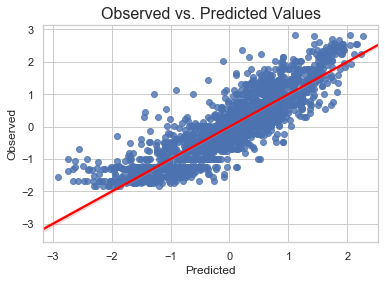

In [212]:
sns.regplot(x=prediction.predictions, y=y, line_kws={'color': 'red'})
plt.title('Observed vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Observed')

In [213]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=ols_model)

(1.2070590811320834, 0.0010013121500250226)

##### Normality_test

In [214]:
from scipy import stats
print(stats.jarque_bera(ols_model.resid))

(221.67859804160597, 0.0)


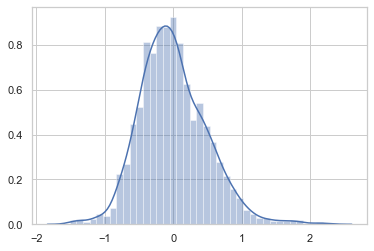

In [215]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

 Since the residual plot is normally distributed, transformation techniques are not required.

##### Homoscedasticity_test(using goldfeld test)

Text(0, 0.5, 'Residuals')

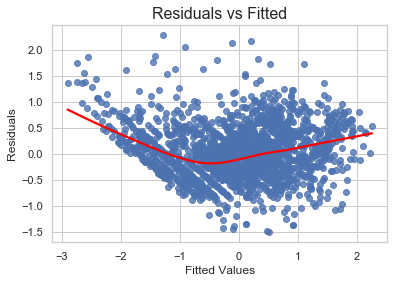

In [216]:
sns.regplot(x=prediction.predictions, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted', fontsize=16)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
# sns.regplot(x=prediction.predictions, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
# ax[1].set_title('Scale-Location', fontsize=16)
# ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

In [217]:
import statsmodels.stats.api as sm
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sm.het_goldfeldquandt(ols_model.resid, ols_model.model.exog)
lzip(name, test)

[('F statistic', 0.9088551538568505), ('p-value', 0.9412480996143842)]

##### Variance Inflation Factor - Multicollinerity check

In [218]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_C.values, i) for i in range(X_C.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico
vif,13.860483,13.456867,1.21792,1.093815,1.436412,1.022697,1.182795,1.668422,1.364714,1.539764,1.075509,1.089508,1.125976


- Amount.Requested and Amount.Funded.By.Investors are highly correlated with each other.

In [219]:
print("Before",X_C.shape)
X_C.drop("Amount.Requested",1,inplace=True)
print("After",X_C.shape)

Before (2176, 14)
After (2176, 13)


In [220]:
X_1 = X.copy()
X_1.drop(["Amount.Requested"],1,inplace=True)
vif1 = [variance_inflation_factor(X_C.values, i) for i in range(X_C.shape[1])]
pd.DataFrame({'vif': vif1[1:]}, index=X_1.columns).sort_values("vif",ascending=False).T

,Monthly.Income,Amount.Funded.By.Investors,Revolving.CREDIT.Balance,Debt.To.Income.Ratio,Open.CREDIT.Lines,Loan.Length,Home.Ownership,Fico,Loan.Purpose,Employment.Length,Inquiries.in.the.Last.6.Months,State
vif,1.65643,1.602717,1.51422,1.433301,1.364248,1.207084,1.182651,1.12486,1.093755,1.088838,1.049985,1.021022


In [221]:
X_1 = X.copy()
X_1.drop(["Amount.Requested"],1,inplace=True)
vif1 = [variance_inflation_factor(X_C.values, i) for i in range(X_C.shape[1])]
pd.DataFrame({'vif': vif1[1:]}, index=X_1.columns).sort_values("vif",ascending=False).T

,Monthly.Income,Amount.Funded.By.Investors,Revolving.CREDIT.Balance,Debt.To.Income.Ratio,Open.CREDIT.Lines,Loan.Length,Home.Ownership,Fico,Loan.Purpose,Employment.Length,Inquiries.in.the.Last.6.Months,State
vif,1.65643,1.602717,1.51422,1.433301,1.364248,1.207084,1.182651,1.12486,1.093755,1.088838,1.049985,1.021022


In [222]:
X.drop(["Amount.Requested"],1,inplace=True)

- "Amount.Requested","State_CA","Loan.Purpose_debt_consolidation" are causing multicollinearity in our model, so we can remove those features.

#### Feature Selection

##### Backward Elimination

In [223]:
import statsmodels.api as sm
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Amount.Funded.By.Investors', 'Loan.Length', 'Loan.Purpose', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months', 'Fico']


##### Recursive Feature Elimination

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
cols = list(X.columns)
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 6)        

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Amount.Funded.By.Investors', 'Loan.Length', 'Loan.Purpose',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months', 'Fico'],
      dtype='object')


##### Step forward selection

In [225]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
linear_model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(linear_model,k_features = 12,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2020-03-20 23:19:24] Features: 1/12 -- score: 0.49752241764491456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2020-03-20 23:19:24] Features: 2/12 -- score: 0.686363252979012[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2020-03-20 23:19:24] Features: 3/12 -- score: 0.7391539658410353[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

#####  Lasso Regression

In [226]:
#Performing Lasso regression as lasso makes the coefficients of all the insignificant features to zero.
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(Lasso(alpha=0.03, random_state=seed)) # remember to set the seed, the random state in this function
sel_.fit(X, y)
# print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
# print("Best score using built-in LassoCV: %f" %reg.score(X,y))
# print("*"*60)
# coef = pd.Series(reg.coef_, index = X.columns)
# print(coef)

SelectFromModel(estimator=Lasso(alpha=0.03, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [227]:
selected_feat = X.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 12
selected features: 6
features with coefficients shrank to zero: 6


In [228]:
selected_feat

Index(['Amount.Funded.By.Investors', 'Loan.Length', 'Loan.Purpose',
       'Open.CREDIT.Lines', 'Inquiries.in.the.Last.6.Months', 'Fico'],
      dtype='object')

#### Model Building Phase

###### OLS Regression

In [229]:
import statsmodels.api as sm
X_C = sm.add_constant(X)
ols_model = sm.OLS(y,X_C).fit()

In [230]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest.Rate   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     567.0
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:19:25   Log-Likelihood:                -1540.5
No. Observations:                2176   AIC:                             3107.
Df Residuals:                    2163   BIC:                             3181.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.806e-17      0.011  -7.39e-15      1.000      -0.021       0.021
Amount.Funded.By.Investors         0.2909      0.013     21.757      0.000       0.265       0.317
Loan.Length                        0.3204      0.012     27.614      0.000       0.298       0.343
Loan.Purpose                       0.0561      0.011      5.077      0.000       0.034       0.078
Debt.To.Income.Ratio               0.0034      0.013      0.270      0.787      -0.021       0.028
State                             -0.0006      0.011     -0.061      0.952      -0.022       0.020
Home.Ownership                     0.0211      0.011      1.839      0.066      -0.001       0.044
Monthly.Income                    -0.0151      0.014     -1.113      0.266      -0.042       0.012
Open.CREDIT.Lines                 -0.0318      0.012     -2.579      0.010      -0.056      -0.008
Revolving.CREDIT.Balance          -0.0291      0.013     -2.242      0.025      -0.055      -0.004
Inquiries.in.the.Last.6.Months     0.1166      0.011     10.774      0.000       0.095       0.138
Employment.Length                  0.0087      0.011      0.788      0.431      -0.013       0.030
Fico                              -0.7300      0.011    -65.173      0.000      -0.752      -0.708
==============================================================================
Omnibus:                      147.666   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.764
Skew:                           0.559   Prob(JB):                     8.52e-48
Kurtosis:                       4.068   Cond. No.                         2.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Linear Regression

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error,mean_absolute_error,mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [232]:
print(lr_model.score(X_train,y_train))
print(lr_model.score(X_test,y_test))

0.7620016910173505
0.7481988397195449


In [233]:
def error_metrics(y_test,y_pred):
    print("MAE : ",round(mean_absolute_error(y_test,y_pred),3))
    print("RMSE: ",round(mean_squared_error(y_test,y_pred,squared=False),3))
    print("MAPE : ",round(np.mean(np.abs((y_test - y_pred) / y_test)) * 100,3))

In [234]:
y_pred = lr_model.predict(X_test)
error_metrics(y_test,y_pred)

MAE :  0.389
RMSE:  0.513
MAPE :  362.487


In [235]:
cols1 = ['Amount.Funded.By.Investors', 'Loan.Length', 'Loan.Purpose',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months', 'Fico','Open.CREDIT.Lines']
lr_imp_features = LinearRegression()
lr_imp_features.fit(X_train[cols1],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [236]:
y_pred = lr_imp_features.predict(X_test[cols1])

In [237]:
print(lr_imp_features.score(X_train[cols1],y_train))
print(lr_imp_features.score(X_test[cols1],y_test))

0.7614347235949401
0.7487342608141336


In [238]:
kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=seed)

cv_results = model_selection.cross_val_score(lr_imp_features,X,y,cv = kfold, scoring='r2')

print("Mean : {}, Variance : {}".format(np.mean(cv_results),np.var(cv_results,ddof=1)))

Mean : 0.7553112063779555, Variance : 0.00020768313092601077


###### Decision Tree Regressor

###### Model

In [239]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=17,min_samples_leaf=17,min_samples_split=15)
DT.fit(X_train[cols1],y_train)
y_pred = DT.predict(X_test[cols1])

r2=DT.score(X_train[cols1],y_train)
print('R_square_Training:',r2*100)
r2=DT.score(X_test[cols1],y_test)
print('R_square_Testing:',r2*100)

error_metrics(y_test,y_pred)

R_square_Training: 84.03651653130395
R_square_Testing: 75.67514327022326
MAE :  0.36
RMSE:  0.504
MAPE :  497.053


In [240]:
Important_features = pd.DataFrame(DT.feature_importances_,index=cols1,columns=["Importance"])
Important_features.sort_values("Importance",ascending=False).head(10)

,Importance
Fico,0.653623
Loan.Length,0.219508
Amount.Funded.By.Investors,0.091806
Inquiries.in.the.Last.6.Months,0.020357
Open.CREDIT.Lines,0.011321
Revolving.CREDIT.Balance,0.001871
Loan.Purpose,0.001513


###### Hyper parameter tuning

In [361]:
parameters = {'max_depth' : range(4,20,1),
             'min_samples_split' : range(1,50,4),
              'min_samples_leaf' : range(1,50,4)}
model = DecisionTreeRegressor(random_state=seed)
grid_search_cv = RandomizedSearchCV(estimator=model,param_distributions=parameters,cv=5,verbose=2,scoring="r2")
grid_search_cv.fit(X_train[cols1],y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=21, min_samples_leaf=29, max_depth=6 ..........
[CV]  min_samples_split=21, min_samples_leaf=29, max_depth=6, total=   0.0s
[CV] min_samples_split=21, min_samples_leaf=29, max_depth=6 ..........
[CV]  min_samples_split=21, min_samples_leaf=29, max_depth=6, total=   0.0s
[CV] min_samples_split=21, min_samples_leaf=29, max_depth=6 ..........
[CV]  min_samples_split=21, min_samples_leaf=29, max_depth=6, total=   0.0s
[CV] min_samples_split=21, min_samples_leaf=29, max_depth=6 ..........
[CV]  min_samples_split=21, min_samples_leaf=29, max_depth=6, total=   0.0s
[CV] min_samples_split=21, min_samples_leaf=29, max_depth=6 ..........
[CV]  min_samples_split=21, min_samples_leaf=29, max_depth=6, total=   0.0s
[CV] min_samples_split=17, min_samples_leaf=17, max_depth=15 .........
[CV]  min_samples_split=17, min_samples_leaf=17, max_depth=15, total=   0.0s
[CV] min_samples_split=17, min_samples_leaf=17, max_dept

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] min_samples_split=21, min_samples_leaf=41, max_depth=18 .........
[CV]  min_samples_split=21, min_samples_leaf=41, max_depth=18, total=   0.0s
[CV] min_samples_split=21, min_samples_leaf=41, max_depth=18 .........
[CV]  min_samples_split=21, min_samples_leaf=41, max_depth=18, total=   0.0s
[CV] min_samples_split=21, min_samples_leaf=41, max_depth=18 .........
[CV]  min_samples_split=21, min_samples_leaf=41, max_depth=18, total=   0.0s
[CV] min_samples_split=21, min_samples_leaf=41, max_depth=18 .........
[CV]  min_samples_split=21, min_samples_leaf=41, max_depth=18, total=   0.0s
[CV] min_samples_split=21, min_samples_leaf=41, max_depth=18 .........
[CV]  min_samples_split=21, min_samples_leaf=41, max_depth=18, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=5, max_depth=14 ...........
[CV]  min_samples_split=5, min_samples_leaf=5, max_depth=14, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=5, max_depth=14 ...........
[CV]  min_samples_split=5, min_samples_leaf

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=0,
                                                   splitter='best'),
                   iid='depr

In [362]:
print("Best_params : ",grid_search_cv.best_params_)
print("Best score : ",grid_search_cv.best_score_)

Best_params :  {'min_samples_split': 17, 'min_samples_leaf': 17, 'max_depth': 15}
Best score :  0.7575565652668433


In [238]:
kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=seed)

cv_results = model_selection.cross_val_score(DT,X,y,cv = kfold, scoring='r2')

print("Mean : {}, Variance : {}".format(np.mean(cv_results),np.var(cv_results,ddof=1)))

Mean : 0.7592424947992195, Variance : 0.0009429993244846199


##### Random Forest Regressor

In [241]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, min_samples_split=5,min_samples_leaf=5, max_depth=18,random_state=seed)
rf.fit(X_train[cols1],y_train)
y_pred = rf.predict(X_test[cols1])

In [242]:
r2_train=rf.score(X_train[cols1],y_train)
print('R_square_Training:',r2_train*100)
r2_test=rf.score(X_test[cols1],y_test)
print('R_square_Testing:',r2_test*100)
error_metrics(y_test,y_pred)

R_square_Training: 90.04773903366939
R_square_Testing: 78.62869995294503
MAE :  0.337
RMSE:  0.473
MAPE :  479.739


In [342]:
parameters = {'max_depth' : range(4,20,1),
             'min_samples_split' : range(1,50,4),
              'min_samples_leaf' : range(1,50,4),
              'n_estimators':range(100,1000,100)
             }
model = RandomForestRegressor(random_state=seed)
grid_search_cv = RandomizedSearchCV(estimator=model,param_distributions=parameters,cv=5,verbose=2,scoring="r2")
grid_search_cv.fit(X_train[cols1],y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=29, min_samples_leaf=49, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=29, min_samples_leaf=49, max_depth=5, total=   2.4s
[CV] n_estimators=600, min_samples_split=29, min_samples_leaf=49, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=29, min_samples_leaf=49, max_depth=5, total=   2.7s
[CV] n_estimators=600, min_samples_split=29, min_samples_leaf=49, max_depth=5 
[CV]  n_estimators=600, min_samples_split=29, min_samples_leaf=49, max_depth=5, total=   2.7s
[CV] n_estimators=600, min_samples_split=29, min_samples_leaf=49, max_depth=5 
[CV]  n_estimators=600, min_samples_split=29, min_samples_leaf=49, max_depth=5, total=   2.3s
[CV] n_estimators=600, min_samples_split=29, min_samples_leaf=49, max_depth=5 
[CV]  n_estimators=600, min_samples_split=29, min_samples_leaf=49, max_depth=5, total=   2.4s
[CV] n_estimators=100, min_samples_split=41, min_samples_leaf=13, max_depth=16 
[CV]  n_estimators=100, min_samples_split=41, min_samples_leaf=13, max_depth=16, total=   0.5s
[CV] n_estimators=100, min_samples_split=41, min_samples_leaf=13, max_depth=16 
[CV]  n_estimators=100, min_samples_split=41, min_samples_leaf=13, max_depth=16, total=   0.5s
[CV] n_estimators=100, min_samples_sp

[CV]  n_estimators=800, min_samples_split=45, min_samples_leaf=21, max_depth=5, total=   3.6s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [343]:
print("Best_params : ",grid_search_cv.best_params_)
print("Best score : ",grid_search_cv.best_score_)

Best_params :  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 18}
Best score :  0.8072018962370089


In [241]:
kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=seed)

cv_results = model_selection.cross_val_score(rf,X,y,cv = kfold, scoring='r2')

print("Mean : {}, Variance : {}".format(np.mean(cv_results),np.var(cv_results,ddof=1)))

Mean : 0.8069201283946376, Variance : 0.0004481520560118559


###### K nearest neighbour Regressor

In [243]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train[cols1],y_train)
y_pred = knn.predict(X_test[cols1])

r2_train=knn.score(X_train[cols1],y_train)
print('R_square_Training:',r2_train*100)
r2_test=knn.score(X_test[cols1],y_test)
print('R_square_Testing:',r2_test*100)

error_metrics(y_test,y_pred)

R_square_Training: 84.30042092786698
R_square_Testing: 74.85042887866167
MAE :  0.381
RMSE:  0.513
MAPE :  429.917


In [244]:
kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=seed)
cv_results = model_selection.cross_val_score(knn,X,y,cv = kfold, scoring='r2')

print("Mean : {}, Variance : {}".format(np.mean(cv_results),np.var(cv_results,ddof=1)))

Mean : 0.6656817381480072, Variance : 0.0005234149753914571


###### Polynomial Regressor

In [245]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train[cols1])
X_test_poly = poly.fit_transform(X_test[cols1])

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
y_pred = lr_poly.predict(X_test_poly)

r2_train=lr_poly.score(X_train_poly,y_train)
print('R_square_Training:',r2_train*100)
r2_test=lr_poly.score(X_test_poly,y_test)
print('R_square_Testing:',r2_test*100)

error_metrics(y_test,y_pred)

R_square_Training: 82.88714939211033
R_square_Testing: 81.66033829357755
MAE :  0.316
RMSE:  0.438
MAPE :  347.396


In [246]:
kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=seed)
X_poly = poly.fit_transform(X[cols1])
cv_results = model_selection.cross_val_score(lr_poly,X_poly,y,cv = kfold, scoring='r2')

print("Mean : {}, Variance : {}".format(np.mean(cv_results),np.var(cv_results,ddof=1)))

Mean : 0.8187027534193559, Variance : 0.00046247557917554


###### Support Vector Regressor

In [247]:
from sklearn.svm import SVR

svr = SVR(kernel="rbf",C=1,degree=2,epsilon=0.01)
svr.fit(X_train[cols1],y_train)

y_pred = svr.predict(X_test[cols1])
r2=svr.score(X_train[cols1],y_train)
print('R_square_Training:',r2*100)
r2=svr.score(X_test[cols1],y_test)
print('R_square_Testing:',r2*100)
error_metrics(y_test,y_pred)

R_square_Training: 86.30025938249143
R_square_Testing: 79.2358859249207
MAE :  0.327
RMSE:  0.466
MAPE :  499.35


In [372]:
paramters = {'kernel':['linear','rbf'],
            'degree' : [2,3],
            'C':range(0,5,1),
            'epsilon':[0.1,0.01,0.001]}
grid_search =RandomizedSearchCV(estimator=svr,param_distributions=paramters,verbose=2,cv=5)
grid_search.fit(X_train[cols1],y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] kernel=linear, epsilon=0.001, degree=2, C=4 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... kernel=linear, epsilon=0.001, degree=2, C=4, total=   0.6s
[CV] kernel=linear, epsilon=0.001, degree=2, C=4 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ...... kernel=linear, epsilon=0.001, degree=2, C=4, total=   0.7s
[CV] kernel=linear, epsilon=0.001, degree=2, C=4 .....................
[CV] ...... kernel=linear, epsilon=0.001, degree=2, C=4, total=   0.7s
[CV] kernel=linear, epsilon=0.001, degree=2, C=4 .....................
[CV] ...... kernel=linear, epsilon=0.001, degree=2, C=4, total=   0.7s
[CV] kernel=linear, epsilon=0.001, degree=2, C=4 .....................
[CV] ...... kernel=linear, epsilon=0.001, degree=2, C=4, total=   0.6s
[CV] kernel=linear, epsilon=0.001, degree=2, C=0 .....................
[CV] ...... kernel=linear, epsilon=0.001, degree=2, C=0, total=   0.0s
[CV] kernel=linear, epsilon=0.001, degree=2, C=0 .....................
[CV] ...... kernel=linear, epsilon=0.001, degree=2, C=0, total=   0.0s
[CV] kernel=linear, epsilon=0.001, degree=2, C=0 .....................
[CV] ...... kernel=linear, epsilon=0.001, degree=2, C=0, total=   0.0s
[CV] kernel=linear, epsilon=0.001, degree=2, C=0 .....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=2, cache_size=200, coef0=0.0, degree=2,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': range(0, 5), 'degree': [2, 3],
                                        'epsilon': [0.1, 0.01, 0.001],
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [374]:
print("Best_params : ",grid_search.best_params_)
print("Best score : ",grid_search.best_score_)

Best_params :  {'kernel': 'rbf', 'epsilon': 0.01, 'degree': 3, 'C': 1}
Best score :  0.8166036247090176


In [248]:
kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=seed)
cv_results = model_selection.cross_val_score(svr,X,y,cv = kfold, scoring='r2')

print("Mean : {}, Variance : {}".format(np.mean(cv_results),np.var(cv_results,ddof=1)))

Mean : 0.8117180212389121, Variance : 0.00052357793829462


#### AdaBoost Regressor

In [260]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(base_estimator=rf,random_state=seed,n_estimators=100)
adaboost.fit(X_train[cols1],y_train)

y_pred = adaboost.predict(X_test[cols1])

r2=adaboost.score(X_train[cols1],y_train)
print('R_square_Training:',r2*100)
r2=adaboost.score(X_test[cols1],y_test)
print('R_square_Testing:',r2*100)
error_metrics(y_test,y_pred)

R_square_Training: 94.48677554630395
R_square_Testing: 78.27223429387651
MAE :  0.35
RMSE:  0.477
MAPE :  416.833


In [401]:
parameters_for_tuning = {
   'learning_rate':[0.1,0.01,1],
    'base_estimator':[lr_imp_features,DT,rf,svr]
    
}
adaboost = AdaBoostRegressor(random_state=seed)
grid_search =GridSearchCV(estimator=adaboost,param_grid=parameters_for_tuning,verbose=2,cv=5)
grid_search.fit(X_train[cols1],y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), learning_rate=0.1 
[CV]  base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), learning_rate=0.1, total=   0.2s
[CV] base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), learning_rate=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), learning_rate=0.1, total=   0.1s
[CV] base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), learning_rate=0.1 
[CV]  base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), learning_rate=0.1, total=   0.1s
[CV] base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), learning_rate=0.1 
[CV]  base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), learning_rate=0.1, total=   0.1s
[CV] base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), learning_rate=0.1 
[CV]  base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), learning_rate=0.1, total=   0.1s
[CV] base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),

[CV]  base_estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=17,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=17, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'), learning_rate=0.01, total=   0.4s
[CV] base_estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=17,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=17, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'), learning_rate=0.01 
[CV]  base_estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=17,
            

[CV]  base_estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False), learning_rate=0.1, total=  31.8s
[CV] base_estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
        

[CV]  base_estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False), learning_rate=0.01, total=  31.1s
[CV] base_estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
       

[CV]  base_estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=0.01, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), learning_rate=0.1, total=  10.6s
[CV] base_estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=0.01, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), learning_rate=0.1 
[CV]  base_estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=0.01, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), learning_rate=0.1, total=  10.4s
[CV] base_estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=0.01, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), learning_rate=0.01 
[CV]  base_estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=0.01, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), learning_rate=0.01, total=  10.6s
[CV] base_est

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 10.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=0),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [LinearRegression(copy_X=True,
                                                             fit_intercept=True,
                                                             n_jobs=None,
                                                             normalize=False),
                                            DecisionTreeRegressor(ccp_alpha=0.0,
                                                                  criterion='mse',
                                                                  max_depth=17,
                                                                  max...
                                                                  min_weight_fracti

In [402]:
print("Best_params : ",grid_search.best_params_)
print("Best score : ",grid_search.best_score_)

Best_params :  {'base_estimator': SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=0.01, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'learning_rate': 0.01}
Best score :  0.819807981886294


In [261]:
kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=seed)
cv_results = model_selection.cross_val_score(adaboost,X,y,cv = kfold, scoring='r2')

print("Mean : {}, Variance : {}".format(np.mean(cv_results),np.var(cv_results,ddof=1)))

Mean : 0.8058391871846828, Variance : 0.00013122629350001996


##### Gradient Boosting Regressor

In [251]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=400,min_samples_split=9,min_samples_leaf= 24, 
                                max_depth= 13, learning_rate= 0.01,random_state=seed)
gbr.fit(X_train[cols1],y_train)

y_pred = gbr.predict(X_test[cols1])

r2=gbr.score(X_train[cols1],y_train)
print('R_square_Training:',r2*100)
r2=gbr.score(X_test[cols1],y_test)
print('R_square_Testing:',r2*100)

error_metrics(y_test,y_pred)

R_square_Training: 90.19852614895392
R_square_Testing: 79.7073208596567
MAE :  0.325
RMSE:  0.461
MAPE :  438.565


In [379]:
parameters_for_tuning = {
   'learning_rate':[0.1,0.01,0.001],
   'max_depth':range(5,30,2),
   'n_estimators':range(100,500,100),
    'min_samples_split':range(1,30),
    'min_samples_leaf':range(1,30)
}
grid_search =RandomizedSearchCV(estimator=gbr,param_distributions=parameters_for_tuning,verbose=2,cv=5)
grid_search.fit(X_train[cols1],y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=29, min_samples_leaf=9, max_depth=5, learning_rate=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=29, min_samples_leaf=9, max_depth=5, learning_rate=0.1, total=   1.2s
[CV] n_estimators=300, min_samples_split=29, min_samples_leaf=9, max_depth=5, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=29, min_samples_leaf=9, max_depth=5, learning_rate=0.1, total=   1.2s
[CV] n_estimators=300, min_samples_split=29, min_samples_leaf=9, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=300, min_samples_split=29, min_samples_leaf=9, max_depth=5, learning_rate=0.1, total=   1.1s
[CV] n_estimators=300, min_samples_split=29, min_samples_leaf=9, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=300, min_samples_split=29, min_samples_leaf=9, max_depth=5, learning_rate=0.1, total=   1.2s
[CV] n_estimators=300, min_samples_split=29, min_samples_leaf=9, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=300, min_samples_split=29, min_samples_leaf=9, max_depth=5, learning_rate=0.1, total=   1.2s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=6, max_depth=11, learning_rate=0.01 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=6, max_depth=11, learning_rate=0.01, total=   0.7s
[CV] n_estimators=100, min_samples_split=8, min_sa

[CV]  n_estimators=400, min_samples_split=9, min_samples_leaf=24, max_depth=13, learning_rate=0.01, total=   2.0s
[CV] n_estimators=400, min_samples_split=9, min_samples_leaf=24, max_depth=13, learning_rate=0.01 
[CV]  n_estimators=400, min_samples_split=9, min_samples_leaf=24, max_depth=13, learning_rate=0.01, total=   2.0s
[CV] n_estimators=400, min_samples_split=9, min_samples_leaf=24, max_depth=13, learning_rate=0.01 
[CV]  n_estimators=400, min_samples_split=9, min_samples_leaf=24, max_depth=13, learning_rate=0.01, total=   2.0s
[CV] n_estimators=400, min_samples_split=9, min_samples_leaf=24, max_depth=13, learning_rate=0.01 
[CV]  n_estimators=400, min_samples_split=9, min_samples_leaf=24, max_depth=13, learning_rate=0.01, total=   1.9s
[CV] n_estimators=400, min_samples_split=9, min_samples_leaf=24, max_depth=13, learning_rate=0.01 
[CV]  n_estimators=400, min_samples_split=9, min_samples_leaf=24, max_depth=13, learning_rate=0.01, total=   2.0s
[CV] n_estimators=400, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [380]:
print("Best_params : ",grid_search.best_params_)
print("Best score : ",grid_search.best_score_)

Best_params :  {'n_estimators': 400, 'min_samples_split': 9, 'min_samples_leaf': 24, 'max_depth': 13, 'learning_rate': 0.01}
Best score :  0.8211454528083347


In [252]:
kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=seed)

cv_results = model_selection.cross_val_score(gbr,X,y,cv = kfold, scoring='r2')

print("Mean : {}, Variance : {}".format(np.mean(cv_results),np.var(cv_results,ddof=1)))

Mean : 0.8203629898746527, Variance : 0.0004465480244753285


##### Extreme Gradient Boosting Regressor

In [253]:
import xgboost
from xgboost.sklearn import XGBRegressor

In [255]:
#Parameters are chosen after fine tuning the model.
model = xgboost.XGBRegressor(subsample= 0.6, reg_lambda= 0.45, reg_alpha= 1e-05, n_estimators= 100,objective='reg:squarederror',
                             min_child_weight= 6, max_depth= 5, learning_rate= 0.07, gamma= 0.1, colsample_bytree= 0.6,
                             random_state=seed)
 
model.fit(X_train[cols1],y_train)
y_pred = model.predict(X_test[cols1])

r2=model.score(X_train[cols1],y_train)
print('R_square_Training:',r2*100)
r2=model.score(X_test[cols1],y_test)
print('R_square_Testing:',r2*100)

error_metrics(y_test,y_pred)

R_square_Training: 90.48744377104451
R_square_Testing: 81.23625480262255
MAE :  0.323
RMSE:  0.443
MAPE :  329.265


In [388]:
#for tuning parameters
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
parameters_for_testing = {
   'colsample_bytree':[0.4,0.6,0.8],
   'gamma':[0,0.03,0.1,0.3],
   'min_child_weight':[1.5,6,10],
   'learning_rate':[0.1,0.07,0.01,0.001],
   'max_depth':[3,5,7,9],
   'n_estimators':[100,1000,10000],
   'reg_alpha':[1e-5, 1e-2,  0.75],
   'reg_lambda':[1e-5, 1e-2, 0.45],
   'subsample':[0.6,0.95]  
}

                    
xgb_model = xgboost.XGBRegressor()

gsearch1 = RandomizedSearchCV(estimator = xgb_model, param_distributions= parameters_for_testing, verbose=10,scoring='r2')
gsearch1.fit(X_train[cols1],y_train)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.6, reg_lambda=0.01, reg_alpha=1e-05, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.001, gamma=0, colsample_bytree=0.8 
[12:51:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, reg_lambda=0.01, reg_alpha=1e-05, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.001, gamma=0, colsample_bytree=0.8, score=-0.090, total=   0.4s
[CV] subsample=0.6, reg_lambda=0.01, reg_alpha=1e-05, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.001, gamma=0, colsample_bytree=0.8 
[12:51:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=0.01, reg_alpha=1e-05, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.001, gamma=0, colsample_bytree=0.8, score=-0.069, total=   0.2s
[CV] subsample=0.6, reg_lambda=0.01, reg_alpha=1e-05, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.001, gamma=0, colsample_bytree=0.8 
[12:51:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=0.01, reg_alpha=1e-05, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.001, gamma=0, colsample_bytree=0.8, score=-0.116, total=   0.2s
[CV] subsample=0.6, reg_lambda=0.01, reg_alpha=1e-05, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.001, gamma=0, colsample_bytree=0.8 
[12:51:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=0.01, reg_alpha=1e-05, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.001, gamma=0, colsample_bytree=0.8, score=-0.071, total=   0.3s
[CV] subsample=0.6, reg_lambda=0.01, reg_alpha=1e-05, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.001, gamma=0, colsample_bytree=0.8 
[12:51:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=0.01, reg_alpha=1e-05, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.001, gamma=0, colsample_bytree=0.8, score=-0.065, total=   0.3s
[CV] subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=10000, min_child_weight=10, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[12:51:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s


[CV]  subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=10000, min_child_weight=10, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, score=0.828, total=  18.6s
[CV] subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=10000, min_child_weight=10, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[12:52:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.9s remaining:    0.0s


[CV]  subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=10000, min_child_weight=10, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, score=0.814, total=  17.6s
[CV] subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=10000, min_child_weight=10, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[12:52:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   37.5s remaining:    0.0s


[CV]  subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=10000, min_child_weight=10, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, score=0.836, total=  16.6s
[CV] subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=10000, min_child_weight=10, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[12:52:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   54.2s remaining:    0.0s


[CV]  subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=10000, min_child_weight=10, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, score=0.798, total=  16.6s
[CV] subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=10000, min_child_weight=10, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[12:53:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.2min remaining:    0.0s


[CV]  subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=10000, min_child_weight=10, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, score=0.818, total=  16.6s
[CV] subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=10000, min_child_weight=6, max_depth=5, learning_rate=0.07, gamma=0, colsample_bytree=0.4 
[12:53:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=10000, min_child_weight=6, max_depth=5, learning_rate=0.07, gamma=0, colsample_bytree=0.4, score=0.786, total=  18.2s
[CV] subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=10000, min_child_weight=6, max_depth=5, learning_rate=0.07, gamma=0, colsample_bytree=0.4 
[12:53:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

[CV]  subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=100, min_child_weight=1.5, max_depth=5, learning_rate=0.07, gamma=0, colsample_bytree=0.6, score=0.828, total=   0.2s
[CV] subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=100, min_child_weight=1.5, max_depth=5, learning_rate=0.07, gamma=0, colsample_bytree=0.6 
[12:56:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=100, min_child_weight=1.5, max_depth=5, learning_rate=0.07, gamma=0, colsample_bytree=0.6, score=0.846, total=   0.2s
[CV] subsample=0.95, reg_lambda=0.45, reg_alpha=0.01, n_estimators=100, min_child_weight=1.5, max_depth=5, learning_rate=0.07, gamma=0, colsample_bytree=0.6 
[12:56:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[CV] subsample=0.6, reg_lambda=0.45, reg_alpha=0.75, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.07, gamma=0.1, colsample_bytree=0.4 
[12:59:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, reg_lambda=0.45, reg_alpha=0.75, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.07, gamma=0.1, colsample_bytree=0.4, score=0.782, total=   0.2s
[CV] subsample=0.6, reg_lambda=0.45, reg_alpha=1e-05, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.07, gamma=0.1, colsample_bytree=0.6 
[12:59:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, reg_lambda=0.45, reg_alpha=1e-05, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.07, gamma=0.1, colsample_bytree=0.6, score=0.825, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.1min finished


AttributeError: 'RandomizedSearchCV' object has no attribute 'grid_scores_'

In [391]:
print("Best_params : ",gsearch1.best_params_)
print("Best score : ",gsearch1.best_score_)

Best_params :  {'subsample': 0.6, 'reg_lambda': 0.45, 'reg_alpha': 1e-05, 'n_estimators': 100, 'min_child_weight': 6, 'max_depth': 5, 'learning_rate': 0.07, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best score :  0.8274597359053937


In [256]:
kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=seed)
    
cv_results = model_selection.cross_val_score(model,X,y,cv = kfold, scoring='r2')

print("Mean : {}, Variance : {}".format(np.mean(cv_results),np.var(cv_results,ddof=1)))

Mean : 0.8294633230339613, Variance : 0.00027982823947163423


In [262]:
models = []
models.append(["Linear Regression",lr_imp_features])
models.append(["Desicion Tree Regressor",DT])
models.append(["Random Forest Regressor",rf])
models.append(["K Nearest Neighbour Regressor ",knn])
models.append(["Support Vector Regressor",svr])
models.append(["Adaboost",adaboost])
models.append(["Gradient Boosting Regressor",gbr])
models.append(["Extreme Gradient Boosting Regressor",model])

Linear Regression:0.755311 (0.000208)
Desicion Tree Regressor:0.770033 (0.000133)
Random Forest Regressor:0.811045 (0.000191)
K Nearest Neighbour Regressor :0.658461 (0.000523)
Support Vector Regressor:0.808721 (0.000314)
Adaboost:0.805839 (0.000131)
Gradient Boosting Regressor:0.820095 (0.000255)
Extreme Gradient Boosting Regressor:0.824613 (0.000108)


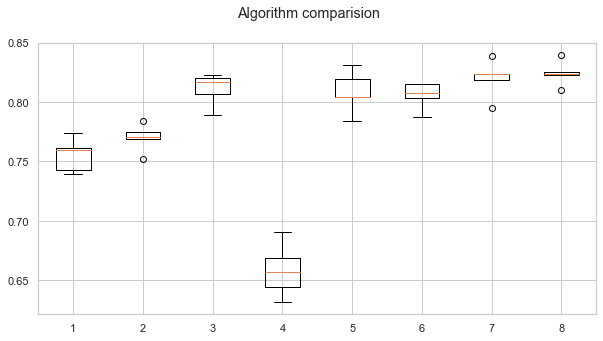

In [263]:
from sklearn import model_selection
import matplotlib.pyplot as plt
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
    cv_results = (model_selection.cross_val_score(model,X,y,cv = kfold))
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
fig = plt.figure(figsize=(10,5))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

###### Final Model
- We will fix the final model as Gradient Boosting Regressor, eventhough XGBoost gave a slightly better accuracy than Gradient Boosting.
- By considering the Computational complexity we shall go with Gradient Boosting Regressor. 

##### Model Interpretability - Gradient Boosting

In [290]:
test_row = X_test.sample()
test_row = test_row[cols1]
test_row

,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico,Open.CREDIT.Lines
461,-2.334592,-0.527727,0.209189,-0.118527,0.916665,-1.026599,-0.462668


###### ELI5

In [313]:
import eli5 as eli

Using TensorFlow backend.


In [318]:
eli.show_weights(gbr, feature_names = cols1,top=None)

Weight,Feature
0.6197 ± 0.3988,Fico
0.2035 ± 0.1695,Loan.Length
0.1078 ± 0.1478,Amount.Funded.By.Investors
0.0262 ± 0.1796,Open.CREDIT.Lines
0.0243 ± 0.0492,Inquiries.in.the.Last.6.Months
0.0148 ± 0.2037,Revolving.CREDIT.Balance
0.0038 ± 0.0795,Loan.Purpose


In [319]:
eli.show_prediction(gbr, test_row.values[0],feature_names=cols1,top=None)

##### SHAP  - SHapley Additive exPlanations

In [364]:
import shap
from shap import LinearExplainer, TreeExplainer, KernelExplainer
shap.initjs()
explainer = TreeExplainer(gbr, X_train[cols1], feature_dependence="independent")
shap_values = explainer.shap_values(test_row.values)

In [365]:
#Local Interpretablity
shap.force_plot(explainer.expected_value,
                shap_values,
                test_row.values,
                feature_names=cols1)

In [366]:
shap_values = explainer.shap_values(X_test.head(250)[cols1].values,check_additivity=False)
shap.force_plot(explainer.expected_value,
                shap_values,
                X_test.head(250)[cols1].values,
                feature_names=cols1)

 99%|===================| 247/250 [01:28<00:01]        

100%|===================| 652/653 [03:50<00:00]        

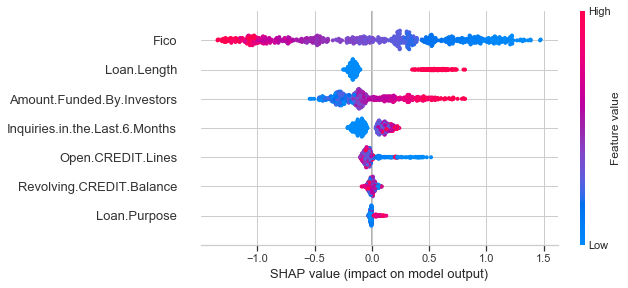

In [367]:
#Global Interpretability
shap_values = explainer.shap_values(X_test[cols1].values,check_additivity=False)
spplot = shap.summary_plot(shap_values, X_test[cols1].values, feature_names=cols1)

- From the above local and global interpretations we can infer that Fico score and Loan.Length are good indicators for our model.
- In the Global interpretation chart, Fico and Loan.Length have a clear partition between the two classes. As the shap value increases the probability that the class belongs to the positive class increases and vice versa.